In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [5]:
# url = '../img/print_259.jpg'
url = './dataset/print_5.jpg'
img_cv = cv2.imread(url)
# cv2.imshow('Business card', img_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
# img_pl = PIL.Image.open(url)

In [27]:
# type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

In [28]:
type(img_cv)

numpy.ndarray

In [29]:
img_cv.shape

(2630, 1522, 3)

In [30]:
# rotate 90
# img_cv = cv2.rotate(img_cv, cv2.ROTATE_90_CLOCKWISE)

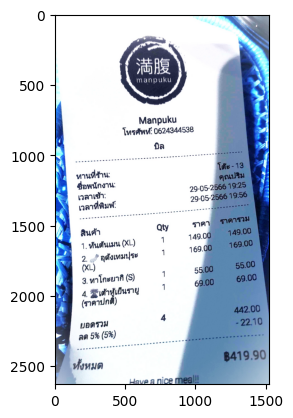

In [31]:
plt.imshow(img_cv)

In [9]:
import easyocr
reader = easyocr.Reader(['th','en']) # this needs to run only once to load the model into memory

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:

result = reader.readtext(url, detail=0)
print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[' invoice(abb)receipt', 'thai yamazaki co. , ltd.', 'saint etoile', '00038: c.rama 3', '0105527027239', 'rd:', '[030230002a0215', ' arisa imjai', '29/09/2023 19:25:55', 'no.: 0132547', '4101/01', '1', '120.00', 'v.', 'โรลกาแฟ', 'โรลวนิลา', '2', '110.00', 'v', 'ซีส & พาเมชานซีสสติก', '1', '40.00', 'v.', 'แชมปิญองริชมิลคครอกมูส', ' subtotal', '5', '360.00', '360,00', 'total', 'grand total', '360.00', ' vatable', '336.45', '23.55', ' cash', '1,000. 00', ' change', '640.00', 'vat incl uded', 'สมัครเป็นสมาชิกไดแล้าวันนี้', 'เพื่อใชสะสมคะแนนและรับสิทธิพิเศษมากมาย', 'ก้บสาขาทีเข้าร่วมรายการเท่านั่น', 'tax', 'tax:', 'staff:', ' shop:', 'vat']


In [12]:
type(result)

list

In [11]:
# reader.readtext(url, detail = 0)
for x in result:
    print(x.strip())


invoice(abb)receipt
thai yamazaki co. , ltd.
saint etoile
00038: c.rama 3
0105527027239
rd:
[030230002a0215
arisa imjai
29/09/2023 19:25:55
no.: 0132547
4101/01
1
120.00
v.
โรลกาแฟ
โรลวนิลา
2
110.00
v
ซีส & พาเมชานซีสสติก
1
40.00
v.
แชมปิญองริชมิลคครอกมูส
subtotal
5
360.00
360,00
total
grand total
360.00
vatable
336.45
23.55
cash
1,000. 00
change
640.00
vat incl uded
สมัครเป็นสมาชิกไดแล้าวันนี้
เพื่อใชสะสมคะแนนและรับสิทธิพิเศษมากมาย
ก้บสาขาทีเข้าร่วมรายการเท่านั่น
tax
tax:
staff:
shop:
vat


### Text from Image

ModuleNotFoundError: No module named 'tesseract'

In [34]:
# text_cv = pytesseract.image_to_string(img_cv, lang="eng")
text_cv = pytesseract.image_to_string(img_cv, lang="tha+eng", config='--psm 6')
print(text_cv)

aan     จ
manpuku                   €-
ป                           .      4 |
              Manpuku       !       i
สก          โทรศัพท์: 0624344538         ป  &
|   )                                                 บิล                                                   =
5  |   - 202 0.           !
y      ทานที่ร้าน:                                                            |                 Bee |
"|     ชื่อพนักงาน:                                                       §                ie
Soya:                                              29-05  56                    |
4 }     เวลาที่พิมพ์:                                         99-05
a                               Qty             ราคา
เณ | 1 ทันตันเมน (XL)              1              149.09            6
พ๓                    |
Mm 3. miinewf (S)            1             5 1
) ” เต้าหู้เย็นราย              1                   of                                      |
|    moat                             }
a OATH         4          

In [35]:
# text_pl = text_cv = pytesseract.image_to_string(img_pl, lang="eng")
# text_pl = text_cv = pytesseract.image_to_string(img_pl, lang="tha+eng")

In [36]:
# print(text_pl)

### Image to Data

In [37]:
data = pytesseract.image_to_data(img_cv , lang="tha+eng", config='--psm 6')

In [38]:
print(data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1522	2630	-1	
2	1	1	0	0	0	0	0	1522	2630	-1	
3	1	1	1	0	0	0	0	1522	2630	-1	
4	1	1	1	1	0	584	0	929	430	-1	
5	1	1	1	1	1	584	313	236	117	35.170364	aan
5	1	1	1	1	2	1414	0	99	404	66.303604	จ
4	1	1	1	2	0	582	412	822	83	-1	
5	1	1	1	2	1	582	449	242	46	85.530777	manpuku
5	1	1	1	2	2	1327	412	77	54	75.961517	€-
4	1	1	1	3	0	42	509	1436	144	-1	
5	1	1	1	3	1	42	650	2	3	77.610977	ป
5	1	1	1	3	2	1171	540	3	2	0.000000	.
5	1	1	1	3	3	1411	509	67	105	46.877819	4
5	1	1	1	3	4	1489	573	8	24	77.809044	|
4	1	1	1	4	0	598	618	900	174	-1	
5	1	1	1	4	1	598	723	266	69	92.701889	Manpuku
5	1	1	1	4	2	1172	738	3	2	53.582458	!
5	1	1	1	4	3	1461	618	37	105	10.789520	i
4	1	1	1	5	0	0	746	1501	174	-1	
5	1	1	1	5	1	0	895	5	25	32.845428	ส
5	1	1	1	5	2	54	900	2	5	54.659775	ก
5	1	1	1	5	3	480	806	57	58	96.465012	โท
5	1	1	1	5	4	545	826	18	35	96.979568	ร
5	1	1	1	5	5	562	791	46	81	97.009132	ศั
5	1	1	1	5	6	607	791	26	81	97.023499	พ
5	1	1	1	5	7

In [39]:
# data.split('\n')
# list(map(lambda x: x.split('\t'),['level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext']))
datalist = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(datalist[1:],columns=datalist[0])

In [40]:
datalist

[['level',
  'page_num',
  'block_num',
  'par_num',
  'line_num',
  'word_num',
  'left',
  'top',
  'width',
  'height',
  'conf',
  'text'],
 ['1', '1', '0', '0', '0', '0', '0', '0', '1522', '2630', '-1', ''],
 ['2', '1', '1', '0', '0', '0', '0', '0', '1522', '2630', '-1', ''],
 ['3', '1', '1', '1', '0', '0', '0', '0', '1522', '2630', '-1', ''],
 ['4', '1', '1', '1', '1', '0', '584', '0', '929', '430', '-1', ''],
 ['5',
  '1',
  '1',
  '1',
  '1',
  '1',
  '584',
  '313',
  '236',
  '117',
  '35.170364',
  'aan'],
 ['5', '1', '1', '1', '1', '2', '1414', '0', '99', '404', '66.303604', 'จ'],
 ['4', '1', '1', '1', '2', '0', '582', '412', '822', '83', '-1', ''],
 ['5',
  '1',
  '1',
  '1',
  '2',
  '1',
  '582',
  '449',
  '242',
  '46',
  '85.530777',
  'manpuku'],
 ['5', '1', '1', '1', '2', '2', '1327', '412', '77', '54', '75.961517', '€-'],
 ['4', '1', '1', '1', '3', '0', '42', '509', '1436', '144', '-1', ''],
 ['5', '1', '1', '1', '3', '1', '42', '650', '2', '3', '77.610977', 'ป'],


In [41]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1522,2630,-1,
1,2,1,1,0,0,0,0,0,1522,2630,-1,
2,3,1,1,1,0,0,0,0,1522,2630,-1,
3,4,1,1,1,1,0,584,0,929,430,-1,
4,5,1,1,1,1,1,584,313,236,117,35.170364,aan
5,5,1,1,1,1,2,1414,0,99,404,66.303604,จ
6,4,1,1,1,2,0,582,412,822,83,-1,
7,5,1,1,1,2,1,582,449,242,46,85.530777,manpuku
8,5,1,1,1,2,2,1327,412,77,54,75.961517,€-
9,4,1,1,1,3,0,42,509,1436,144,-1,


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      182 non-null    object
 1   page_num   181 non-null    object
 2   block_num  181 non-null    object
 3   par_num    181 non-null    object
 4   line_num   181 non-null    object
 5   word_num   181 non-null    object
 6   left       181 non-null    object
 7   top        181 non-null    object
 8   width      181 non-null    object
 9   height     181 non-null    object
 10  conf       181 non-null    object
 11  text       181 non-null    object
dtypes: object(12)
memory usage: 17.2+ KB


In [46]:
for i in df['text']:
    print(i, end=',')

,,,,aan,จ,,manpuku,€-,,ป,.,4,|,,Manpuku,!,i,,ส,ก,โท,ร,ศั,พ,ท,์,:,0624344538,ป,&,,|,),บ,ิ,ล,=,,5,|,-,202,0.,!,,y,ท,า,น,ท,ี,่,ร,้,า,น,:,|,Bee,|,,"|,ชื,่,อ,พ,น,ั,ก,ง,า,น,:,§,ie,,Soya:,29-05,56,|,,4,},เว,ล,า,ท,ี,่,พ,ิ,ม,พ,์,:,99-05,,a,Qty,ร,า,ค,า,,เณ,|,1,ท,ั,น,ต,ั,น,เม,น,(XL),1,149.09,6,,พ,๓,|,,Mm,3.,miinewf,(S),1,5,1,,),”,เต้าหู้,เย,็,น,ร,า,ย,1,of,|,,|,moat,},,a,OATH,4,A,,ล,ด,5%,(5%),ก,a,,ท,ั,้,ง,ห,ม,ด,.90,,),:,พ,ร,ง,บ,ง,๑,ส,nicer,

In [44]:
# drop the missing in row
df.dropna(inplace=True)
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height']
df[col_int] = df[col_int].astype(int)

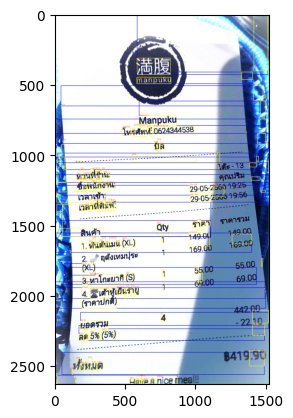

In [45]:
image = img_cv.copy()
for l,x,y,w,h,c,txt in zip(df['level'],df['left'],df['top'],df['width'],df['height'],df['conf'],df['text']):
    # print(l,x,y,w,h,c)
    if l == 1:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)
    elif l == 2:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    elif l == 3:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    elif l == 4:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    elif l == 5:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.putText(image, txt, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0, 0), 1)

plt.imshow(image)
plt.show()
#show image size 50% of original
# re_img =cv2.resize(image, (int(image.shape[1]*0.5), int(image.shape[0]*0.5)))
# cv2.imshow('Business card', re_img)
# cv2.waitKey()
# cv2.destroyAllWindows()
